# Libraries

In [41]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [42]:
#Loading Dataframe

#df=pd.read_csv("vehiclesFinal2.csv")
df=pd.read_csv("vehiclesFinal.csv")
#df=df.drop('Unnamed: 0',axis=1)
df=df.drop('id',axis=1)

df=df.drop('lat',axis=1)
df=df.drop('long',axis=1)
df=df.drop('size',axis=1)

df2=df.copy()
df.head()

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
0,2011.236531,infiniti,g series,fair,5 cylinders,gas,98002.246362,clean,automatic,4wd,offroad,grey,az,6000
1,2011.236531,infiniti,g series,fair,5 cylinders,gas,98002.246362,clean,automatic,4wd,offroad,grey,ar,11900
2,2011.236531,infiniti,g series,fair,5 cylinders,gas,98002.246362,clean,automatic,4wd,offroad,grey,fl,21000
3,2011.236531,infiniti,g series,fair,5 cylinders,gas,98002.246362,clean,automatic,4wd,offroad,grey,ma,1500
4,2011.236531,infiniti,g series,fair,5 cylinders,gas,98002.246362,clean,automatic,4wd,offroad,grey,nc,4900


In [47]:
#defining numerical and categorical values

num_col=['year','odometer']
cat_cols=['state','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color']

# 1) Transforming categorical columns values into integer values

In [48]:
le=preprocessing.LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [49]:
df.head(10)

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
0,2011.236531,17,12954,1,4,2,98002.246362,0,0,0,6,5,3,6000
1,2011.236531,17,12954,1,4,2,98002.246362,0,0,0,6,5,2,11900
2,2011.236531,17,12954,1,4,2,98002.246362,0,0,0,6,5,9,21000
3,2011.236531,17,12954,1,4,2,98002.246362,0,0,0,6,5,19,1500
4,2011.236531,17,12954,1,4,2,98002.246362,0,0,0,6,5,27,4900
5,2011.236531,17,12954,1,4,2,98002.246362,0,0,0,6,5,34,1600
6,2011.236531,17,12954,1,4,2,98002.246362,0,0,0,6,5,34,1000
7,2011.236531,17,12954,1,4,2,98002.246362,0,0,0,6,5,34,15995
8,2011.236531,17,12954,1,4,2,98002.246362,0,0,0,6,5,37,5000
9,2011.236531,17,12954,1,4,2,98002.246362,0,0,0,6,5,38,3000


# 2) Scaling Dataset

In [50]:
#scaling numerical data

norm = StandardScaler()
df['price'] = np.log(df['price'])
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
#df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))

#scaling target variable
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]

#df['state'] = norm.fit_transform(np.arradf['state'] = norm.fit_transform(np.array(df['state']).reshape(-1,1))y(df['state']).reshape(-1,1))


In [51]:
df.head(2)

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
0,-0.229793,17,12954,1,4,2,0.103068,0,0,0,6,5,3,8.699515
1,-0.229793,17,12954,1,4,2,0.103068,0,0,0,6,5,2,9.384294


In [52]:
#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))

In [53]:
X_train

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
252984,-1.549198,7,10651,0,6,2,0.480285,0,0,2,11,8,35
359446,-0.637570,19,16941,2,3,2,1.708919,0,0,0,0,10,48
336293,-1.366873,34,15058,1,4,2,1.136379,0,0,0,6,5,45
336806,-0.637570,15,5542,1,4,2,0.269678,0,0,0,9,4,45
107426,0.821035,12,12017,1,4,2,0.621903,0,0,0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363512,1.003361,8,1649,1,4,2,-1.177942,0,0,0,6,5,48
361797,-1.184547,38,22183,1,4,2,2.572764,0,0,0,10,9,48
153667,-1.184547,7,10686,2,6,0,0.698371,0,0,2,10,10,21
119076,0.638710,38,7148,0,3,2,-0.602269,0,0,1,9,8,14


In [54]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])    

# 3) Model Implementation
### 1)Linear Regression
### 2)Ridge Regression
### 3)Lasso Regression
### 4)K-Neighbors Regressor
### 5)Random Forest Regressor
### 6)Bagging Regressor
### 7)Adaboost Regressor
### 8)XGBoost

## 1) Linear Regression

In [55]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [56]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 4.28855243e-01 -4.89501003e-04 -3.64600289e-07 -2.79308328e-02
  2.01709780e-01 -1.58136819e-01 -2.50927345e-01 -9.03101158e-02
  5.87702969e-02 -8.65969563e-02  2.56500160e-03  5.39624737e-03
 -5.53100886e-04]
MSLE : 0.0023425356851414863
Root MSLE : 0.0483997488127933
R2 Score : 0.6328296787008652 or 63.283%


## 2) Ridge regression

In [57]:
#model object and fitting model
RR=Ridge(alpha=25,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [58]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.0023425390329438016
Root MSLE : 0.048399783397695094
R2 Score : 0.6328290453407508 or 63.2829%


## 3) Lasso Regression

In [59]:
#model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [60]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.0023425745522972045
Root MSLE : 0.04840015033341533
R2 Score : 0.6328266514342947 or 63.2827%


## 4) KNN

In [61]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.04424952246868622
K = 2  , Root MSLE = 0.04178549009709436
K = 3  , Root MSLE = 0.04153148866727402
K = 4  , Root MSLE = 0.04204435742575057
K = 5  , Root MSLE = 0.04248989305074782
K = 6  , Root MSLE = 0.042991018060607546
K = 7  , Root MSLE = 0.04355155735678121
K = 8  , Root MSLE = 0.04402494446458199
K = 9  , Root MSLE = 0.044371123110842785


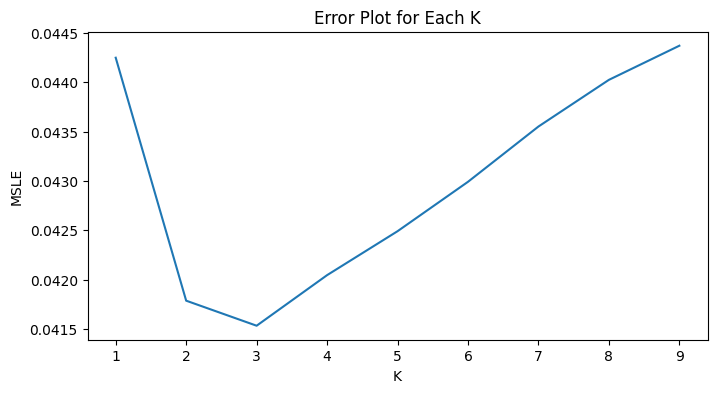

In [62]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [63]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=10) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [64]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.0020068840325899364
Root MSLE : 0.04479825925847941
R2 Score : 0.6914932032770345 or 69.1493%


In [65]:
accu.to_csv('errors.csv')

### 5) Random Forest

In [66]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [67]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.0005721503261446499
Root MSLE : 0.023919664005680553
R2 Score : 0.9164946773987046 or 91.6495%


### 6) Bagging Regressor

In [68]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [69]:
#model evaluation
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.0010737781276922828
Root MSLE : 0.03276855394570048
R2 Score : 0.84122759777592 or 84.1228%


In [70]:
accu['Bagging Regressor']=r6_br
accu.to_csv('errors.csv')

### 7) Adaboost

In [71]:
#model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [72]:
#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.0006101884215245187
Root MSLE : 0.024701992258207003
R2 Score : 0.909984641577164 or 90.9985%


In [73]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('errors.csv')

### 8) XGBOOST

In [74]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [75]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.0005379217614536703
Root MSLE : 0.02319314039654118
R2 Score : 0.9214520232865577 or 92.1452%


In [76]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

# Overall Result

In [77]:
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression,KNN,RandomForest Regressor,Bagging Regressor,AdaBoost Regressor,XGBoost Regressor
MSLE,0.002343,0.002343,0.002343,0.002007,0.000572,0.001074,0.000610,0.000538
Root MSLE,0.048400,0.048400,0.048400,0.044798,0.023920,0.032769,0.024702,0.023193
R2 Score,0.632830,0.632829,0.632827,0.691493,0.916495,0.841228,0.909985,0.921452
Accuracy(%),63.283000,63.282900,63.282700,69.149300,91.649500,84.122800,90.998500,92.145200


In [78]:
import pickle

with open("xg_reg.pkl","wb") as file:
    pickle.dump(xg_reg,file)

In [101]:
pickle.dump(norm, open('StandardScaler.sav', 'wb'))


In [102]:
standardscaler= pickle.load(open('StandardScaler.sav', 'rb'))


In [163]:
data = [[2014.0, 6052]]
# Example data with both 'year' and 'odometer'
columns = ['year', 'odometer']
year_odometer = pd.DataFrame(data=data, columns=columns)

# Transform the data using the loaded StandardScaler
scaled_data1 = standardscaler.transform(year_odometer[['year']])  # Transform using both 'year' and 'odometer'
scaled_data2 = standardscaler.transform(year_odometer[['odometer']])  # Transform using both 'year' and 'odometer'

# Convert the scaled data to a list and print
year1 = scaled_data1[0][0]
odometer2 = scaled_data2[0][0]

0.2740582659381242


In [156]:
print(scaled_data1[0][0].__round__(9))

0.274058266


In [115]:

df.sample(2)

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
290407,0.638710,23,15804,2,5,2,-1.113087,0,2,1,7,10,38,10.239603
115121,0.456384,7,8044,1,3,2,-0.505233,0,0,0,10,5,13,10.373460


In [119]:
X2 =df.iloc[:,:-1]

In [167]:
X2.columns

Index(['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [168]:
test =pd.DataFrame(data=[[year1,23,15804,2,5,2,odometer2,0,1,2,5,6,24]],columns=X2.columns)
pred = xg_reg.predict(test)
price=np.exp(pred[0])
print(price)


9060.651
       year  manufacturer  model  condition  cylinders  fuel    odometer  \
0  0.274058            23  15804          2          5     2  736.505063   

   title_status  transmission  drive  type  paint_color  state  
0             0             1      2     5            6     24  


In [169]:
print(test)

       year  manufacturer  model  condition  cylinders  fuel    odometer  \
0  0.274058            23  15804          2          5     2  736.505063   

   title_status  transmission  drive  type  paint_color  state  
0             0             1      2     5            6     24  


In [133]:
df2['model'].value_counts()

f-150                   6750
silverado 1500          4311
1500                    3624
g series                3293
camry                   2692
                        ... 
express 3500 1 ton         1
cooper s 4-door            1
f-650 extended cab         1
Wrangler Rubicon 392       1
96 Suburban                1
Name: model, Length: 23753, dtype: int64

In [141]:
encoded_labels = le.fit_transform(df2['model'])

# Create a dictionary to map encoded labels to original model names
encoded_to_model = dict(zip(encoded_labels, df2['model']))

# Now you can use 'encoded_to_model' to get the original model names from encoded labels
encoded_label = 3  # Change this to the desired encoded label
original_model_name = encoded_to_model.get(encoded_label)

print(f"Encoded label {encoded_label} corresponds to model: {original_model_name}")


Encoded label 3 corresponds to model: '99 H1 Hummer


In [151]:
df.columns

Index(['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'price'],
      dtype='object')

In [166]:
pickle.dump(xg_reg, open('XGBoostDeploy.sav', 'wb'))